In [ ]:
#Predict House Price

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
housing_data = pd.read_csv('housing_data.csv')
housing_data.tail(5)

,House_Size,Lot_Size,House_Age,Rooms,Bathrooms,Garages,Distance_to_City,House_Price
995,1842.267710,9498.538432,44.017508,7,3,3,25.971730,1572.343535
996,2729.239306,4620.318882,49.034476,5,2,0,9.221511,1351.585851
997,1600.354979,7453.966978,45.056048,4,2,0,4.940552,1223.062465
998,1837.997443,8889.699433,27.821614,4,0,0,26.886818,1387.614447
999,1948.099637,7485.990047,44.823223,3,1,0,9.201646,1328.692087


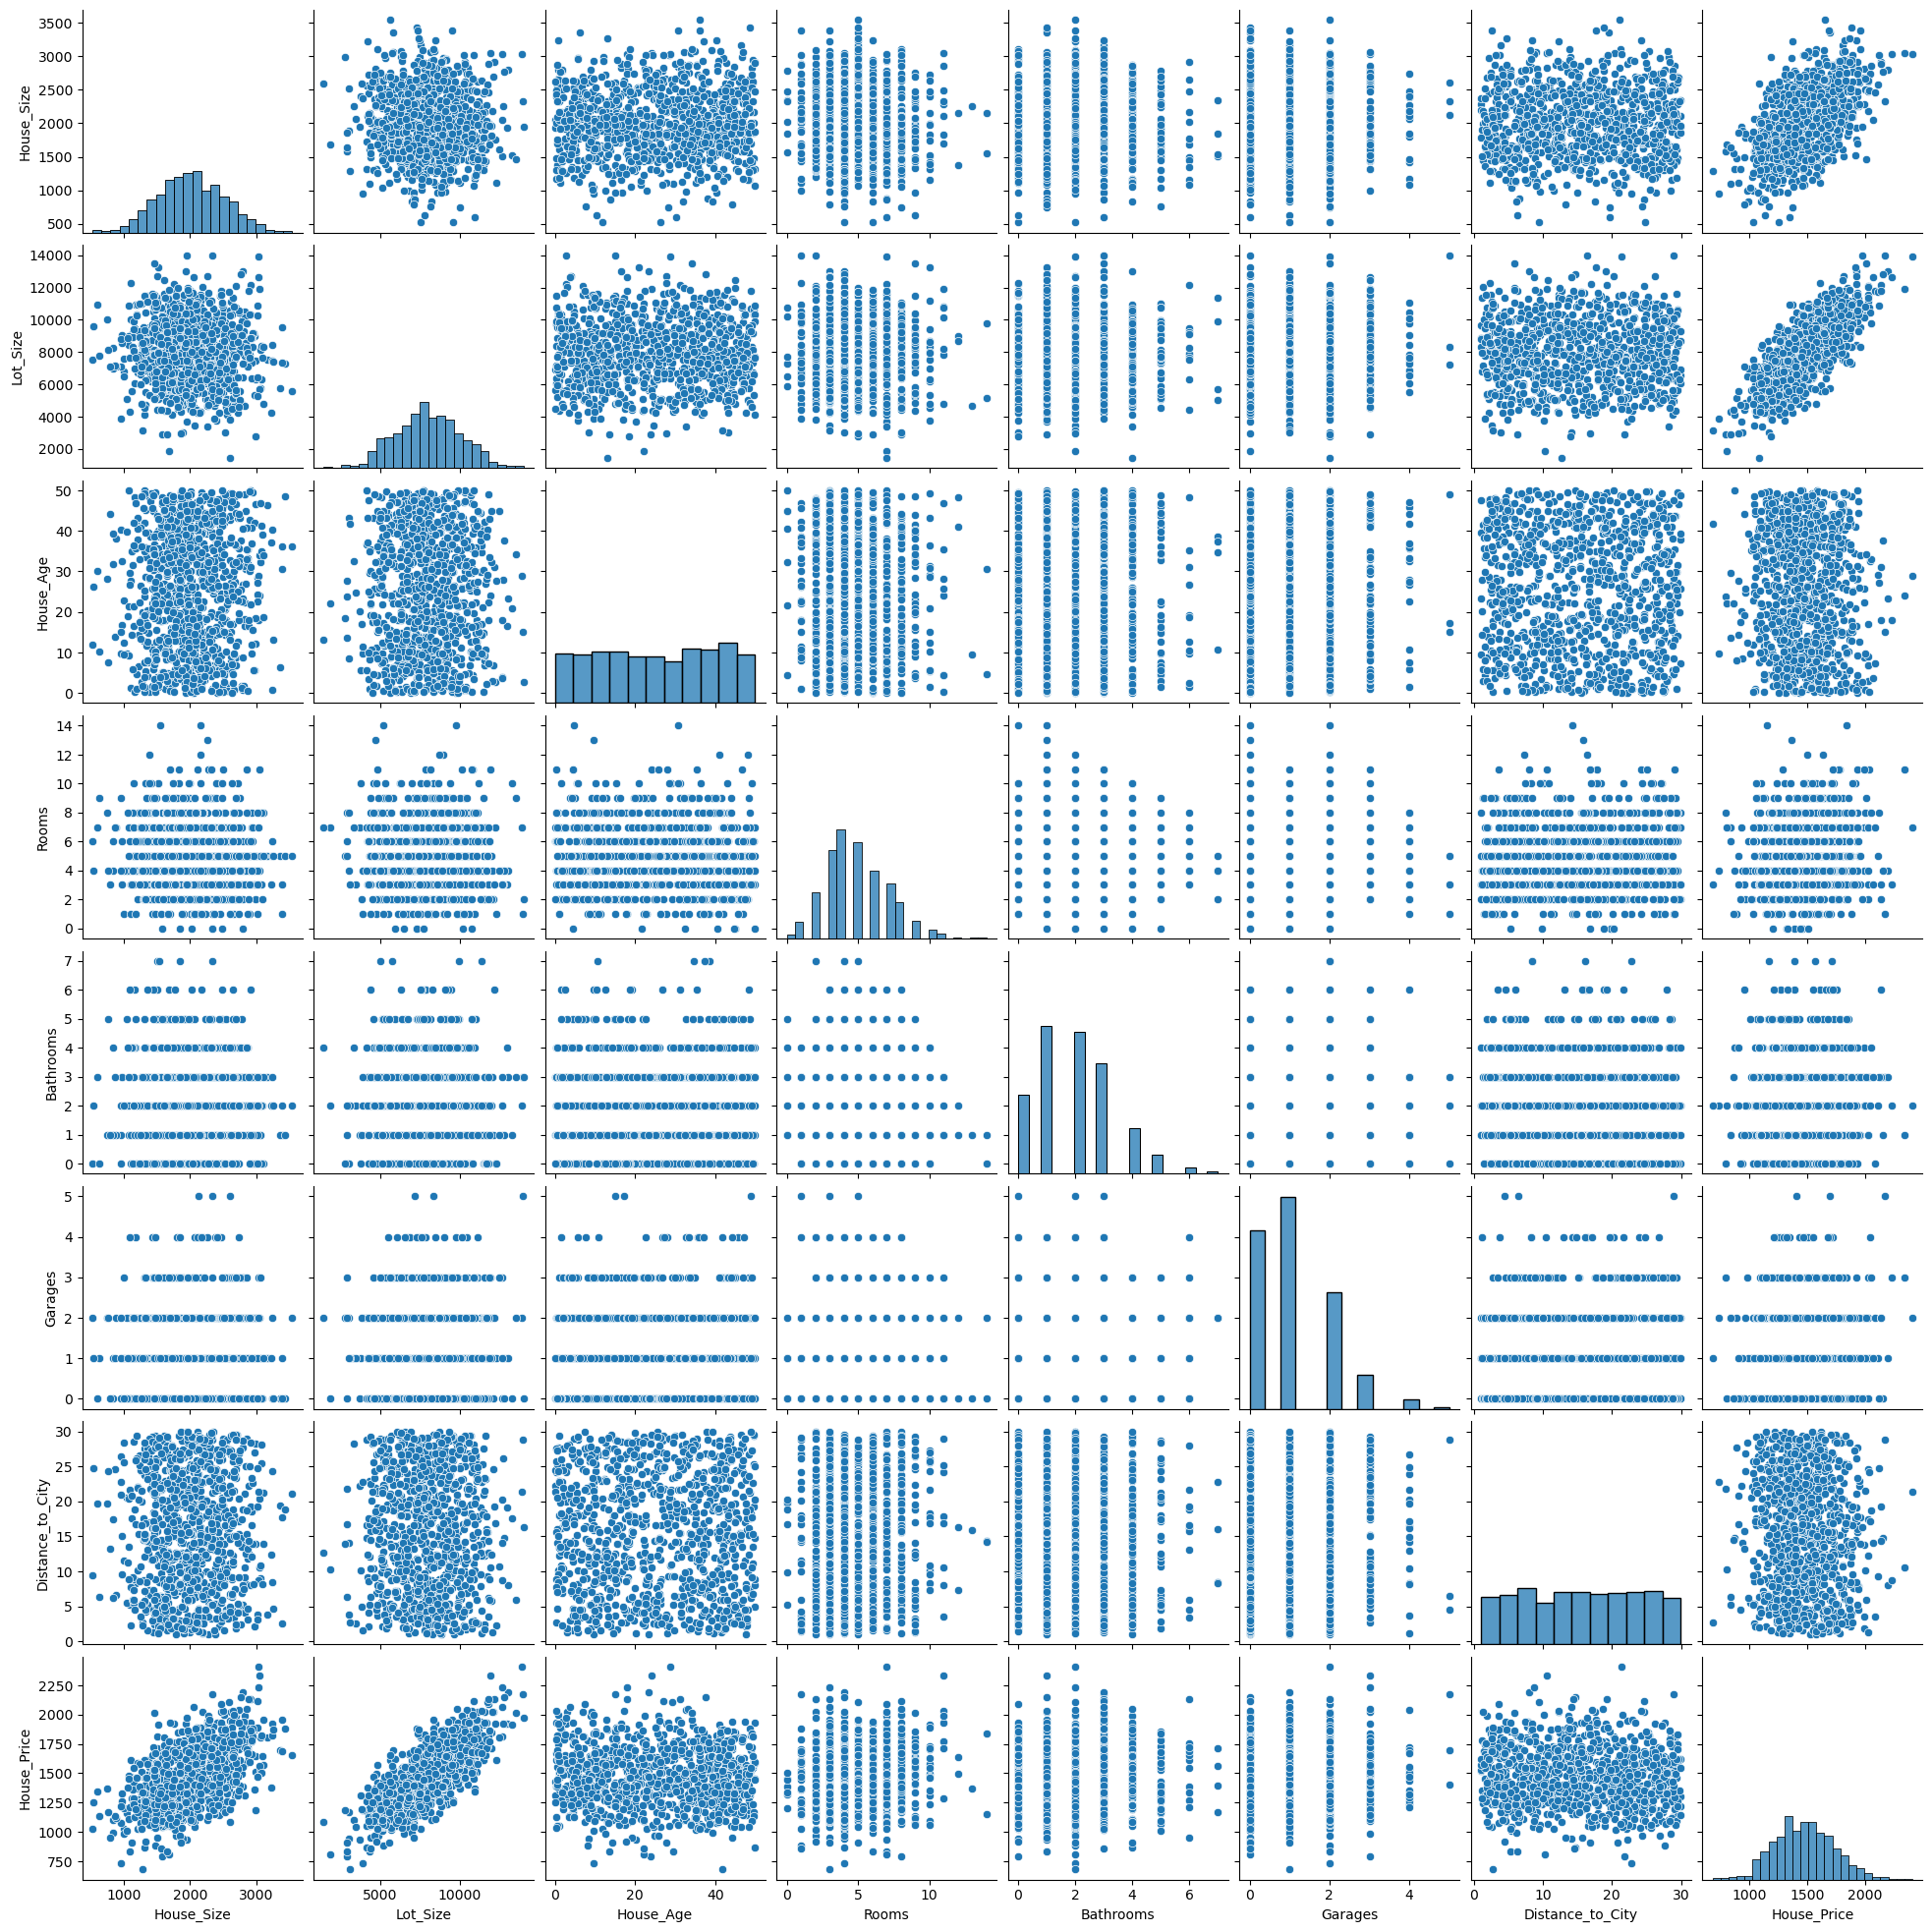

In [3]:
#using pairplot to identify which columns has the linear relationship and to find if we can use MLR with this dataset

sns.pairplot(housing_data)

In [ ]:
# From the plot I could see that the independent variables "House_Size" and "Lot_Size" looks linear. So I am taking those two columns for my prediction.

In [4]:
#assigning variables to the columns 
indp_vars=housing_data[['House_Size','Lot_Size']]
dep_var=housing_data['House_Price']

In [5]:
#splitting 70% fo the data for training and 30% data to test the our model and applying the linear regression and fit the model for training both x and y
train_x,test_x,train_y,test_y=train_test_split(indp_vars,dep_var,test_size=0.3,random_state=51)
mlr_model=LinearRegression()
mlr_model.fit(train_x,train_y)
pred=mlr_model.predict(test_x)
pred

array([1175.75733037, 1561.29089973, 1109.55293002, 1590.47863948,
       1295.04419521, 1289.00620349, 1463.17933331, 1144.69507014,
       1650.86631075, 1571.22651205, 1338.66684802, 1614.4898393 ,
       1056.8657073 , 1347.21879167, 1189.40093118, 1440.75775905,
       1266.97534545, 1702.85176822, 1684.1596067 , 1345.61734678,
       1532.81906503, 1604.03442158, 1526.42029725, 1606.93792255,
       1353.3809446 , 1274.65844905, 1653.81320771, 1270.90846383,
       1626.66907469, 1550.65397312, 1655.7564659 , 1475.29903038,
       1416.12456509, 1539.71474734, 1689.6763618 , 1615.14962397,
       1576.70360335, 1617.48092616, 1807.07901808, 1832.13152441,
       1718.31397924, 1731.48521209, 1411.65673983, 1234.15900017,
       1487.02342359, 1636.5145509 , 1646.18689939, 1711.54914885,
       1165.7696472 , 2048.36609984, 1776.19540537, 1650.22621473,
       1493.67114415, 1185.00424598, 1538.20632921, 1688.13989737,
       1479.13789508, 1406.71948762, 1374.65752536, 1404.74187

In [10]:
#using " Mean Squared error" formula to evaluate the performance  
mse_mlr=mean_squared_error(pred,test_y)
mse_mlr

5853.083883039756

In [8]:
#Fiting the MLR model to the data.
print("Intercept: ", mlr_model.intercept_)
print("Coefficients: \n")
print("House_Size:",mlr_model.coef_[0])
print("Lot_Size:",mlr_model.coef_[1])

Intercept:  100.50434182331537
Coefficients: 

House_Size: 0.28395254639489337
Lot_Size: 0.10024262120411252


In [11]:
#assigning the predicted values in new variable to get the input from user to check the sample house price based on house size and lot size.
new_entry0=input("please enter the House Size :")
new_entry1=input("please enter the Lot Size :")
new_entry=[[float(new_entry0),float(new_entry1)]]
pred_new=mlr_model.predict(new_entry)
print("Predicted House Price: ", pred_new)

please enter the House Size :1500.67853
please enter the Lot Size :7879.54783
Predicted House Price:  [1316.49236012]


C:\Users\91637\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Predicted value for house price')

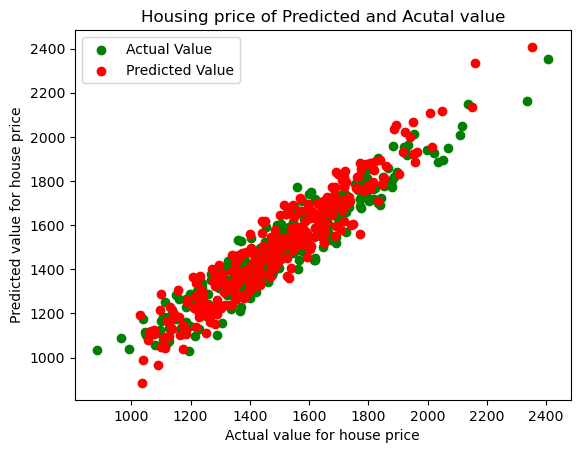

In [13]:
#visualize the results (one plot showing the actual versus the predicted results only)
#using scatter plot to show the difference between actual and predicted results.
plt.scatter(test_y, pred, label='Actual Value', color='green')
plt.scatter(pred, test_y, label='Predicted Value', color='red')
plt.legend()
plt.title('Housing price of Predicted and Acutal value')
plt.xlabel('Actual value for house price')
plt.ylabel('Predicted value for house price')